In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import matplotlib as mpl

In [11]:
plt.style.use('ggplot')

In [12]:
data = np.random.randn(50)

In [13]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [22]:
mpl.get_configdir()

'C:\\Users\\Nitin\\.matplotlib'

In [24]:
mpl.rcParams['lines.linewidth'] = 4

In [25]:
mpl.rcParams['axes.titlesize'] = 20

In [26]:
mpl.rcParams['axes.labelsize'] = 20

In [28]:
mpl.rcParams['xtick.labelsize'] = 16

In [29]:
mpl.rcParams['ytick.labelsize'] = 16

In [31]:
mpl.rcParams['xtick.major.size'] = 7

In [32]:
mpl.rcParams['ytick.major.size'] = 7

In [33]:
mpl.rcParams['legend.numpoints'] = 1

In [55]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] =\
            self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))
    
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer,
                                    numTrials), 1))
    return distances

def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))
        
random.seed(0)
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 8.634
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 100 steps
 Mean = 8.57
 Max = 22.0 Min = 0.0
UsualDrunk random walk of 1000 steps
 Mean = 9.206
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 8.727
 Max = 23.5 Min = 1.4


In [56]:

def simAll(drunkKinds, walkLengths, numTrials):
    for dClass in drunkKinds:
        drunkTest(walkLengths, numTrials, dClass)
        
random.seed(0)
simAll((UsualDrunk, MasochistDrunk),
       (1000, 10000), 100)

UsualDrunk random walk of 1000 steps
 Mean = 8.634
 Max = 21.6 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 8.57
 Max = 22.0 Min = 0.0
MasochistDrunk random walk of 1000 steps
 Mean = 9.818
 Max = 22.9 Min = 1.2
MasochistDrunk random walk of 10000 steps
 Mean = 10.002
 Max = 22.5 Min = 0.4


In [57]:
xVals = [1, 2, 3, 4]

In [58]:
yVals1 = [1, 2, 3, 4]

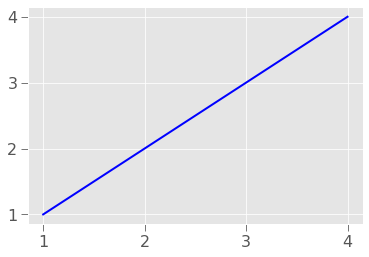

In [61]:
plt.plot(xVals, yVals1, 'b-', label = 'first')

In [62]:
yVals2 = [1, 7, 3, 5]

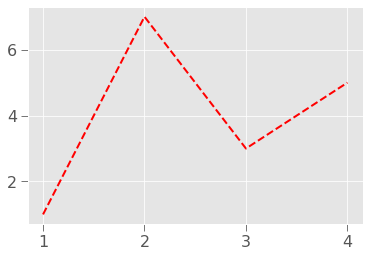

In [63]:
plt.plot(xVals, yVals2, 'r--', label = 'second')

No handles with labels found to put in legend.


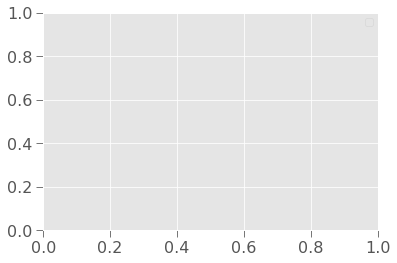

In [64]:
plt.legend()

In [2]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result
    
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of',
              numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        plt.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
    plt.title('Mean Distance from Origin ('
                + str(numTrials) + ' trials)')
    plt.xlabel('Number of Steps')
    plt.ylabel('Distance from Origin')
    plt.legend(loc = 'best')
import random

In [4]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = OddField()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs


In [1]:
def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = pylab.array(xVals)
        yVals = pylab.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ +\
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    plt.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    plt.ylim(-1000, 1000)
    plt.xlim(-1000, 1000)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'lower center')


In [1]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

In [2]:
def playRoulette(game, numspins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
             str(100*totPocket/numSpins) + '%\n')
        return (totPocket/numSpins)

In [5]:
import random
random.seed(0)
game = FairRoulette()

In [6]:
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'
        
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000, 1000000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')
             
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std



100 spins of Fair Roulette
Expected return betting 2 = -100.0%

100 spins of Fair Roulette
Expected return betting 2 = 44.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.046%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.602%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.7964%


Simulate 20 trials of 1000 spins each


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'